# Heart Disease Analysis & Classification

![](https://creakyjoints.org/wp-content/uploads/2019/12/1219_Heart_Inflammation_Logo-1024x671.jpg)

> In this notebook i will try to investigate and visualize heart-disease data and later on evaluate different machine learning models.
> Feel free to comment on this notebook.👍👍

# Importing Libraries

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-disease-uci/heart.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import tree
import os
import preprocessing 

from pandas_profiling import ProfileReport

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif
from sklearn.model_selection import KFold
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

from sklearn.preprocessing import normalize
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier

from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from xgboost import XGBClassifier, XGBRFClassifier
from xgboost import plot_tree, plot_importance

from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE

import warnings
warnings.filterwarnings("ignore")

# Importing the data

In [3]:

df = pd.read_csv('../input/heart-disease-uci/heart.csv')

In [4]:
#Print the first 5 rows
df.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

**Column Descriptions**
1. age
2. sex
3. chest pain type (4 values)
4. resting blood pressure
5. serum cholestoral in mg/dl
6. fasting blood sugar > 120 mg/dl
7. resting electrocardiographic results (values 0,1,2)
8. maximum heart rate achieved
9. exercise induced angina
10. oldpeak = ST depression induced by exercise relative to rest
11. the slope of the peak exercise ST segment
12. number of major vessels (0-3) colored by flourosopy
13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
14. target: 0 or 1 

In [5]:
#Print the numeric information about the data
df.describe()

age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525860   22.905161    0.469794    1.161075    0.616226    1.022606   
min      0.000000   71.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000  133.500000    0.000000    0.000000    1.000000    0.000000   
50%      1.000000  153.000000    0.000000    0.800000    1.000000    0.000000   
75%      1.000000  166.000000    1.000000    1.600000    2.000000    1.000000   
max      2.000000  202.000000    1.000000    6.200000    2.000000    4.000000   

             thal      target  
count  303.000000  303.000000  
mean     2.313531    0.544554  
std      0.612277    0.498835  
min      0.000000    0.000000  
25%      2.000000    0.000000  
50%      2.000000    1.000000  
75%      3.000000    1.000000  
max      3.000000    1.000000

In [6]:
# How many rows the data has
print("Rows:", len(df))

Rows: 303


In [7]:
# How many columns the data has
print("Columns:", df.shape[1])

Columns: 14


# Pandas Profiling

> Pandas profiling generates profile reports from a pandas DataFrame. The pandas df.describe() function is great but a little basic for serious exploratory data analysis. pandas_profiling extends the pandas DataFrame with df.profile_report() for quick data analysis.

In [8]:
import pandas_profiling as pandas_pf
pandas_pf.ProfileReport(df)

Summarize dataset:   0%|          | 0/28 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [9]:
# missing values
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [10]:
features = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal','target']
sns.set_style('darkgrid')

> We haven't got any missing values in this set

Text(0.5, 1.0, 'Age distribution.')

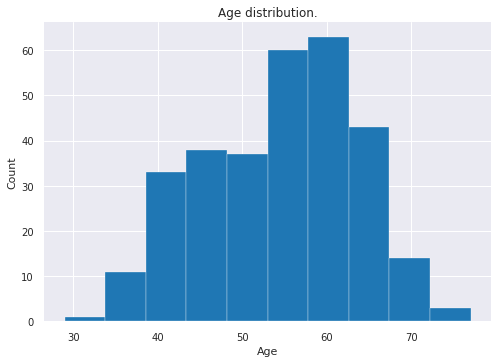

In [11]:
plt.hist(df['age'])
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age distribution.')

> Age distribution by sex (0 = female, 1 = male)

<AxesSubplot:xlabel='age', ylabel='Count'>

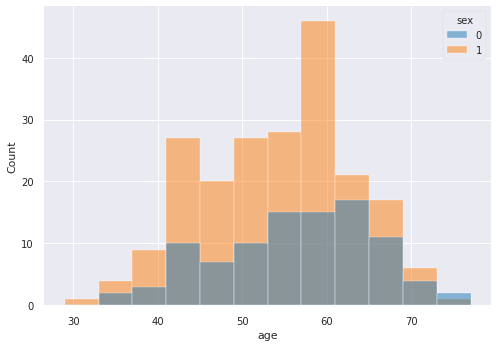

In [12]:
sns.histplot(data=df, x="age", hue="sex")

In [13]:
#Lets investigate age values
minAge=min(df.age)
maxAge=max(df.age)
meanAge=df.age.mean()
print('Min Age :',minAge)
print('Max Age :',maxAge)
print('Mean Age :',meanAge)

Min Age : 29
Max Age : 77
Mean Age : 54.366336633663366


# Seaborn CountPlots

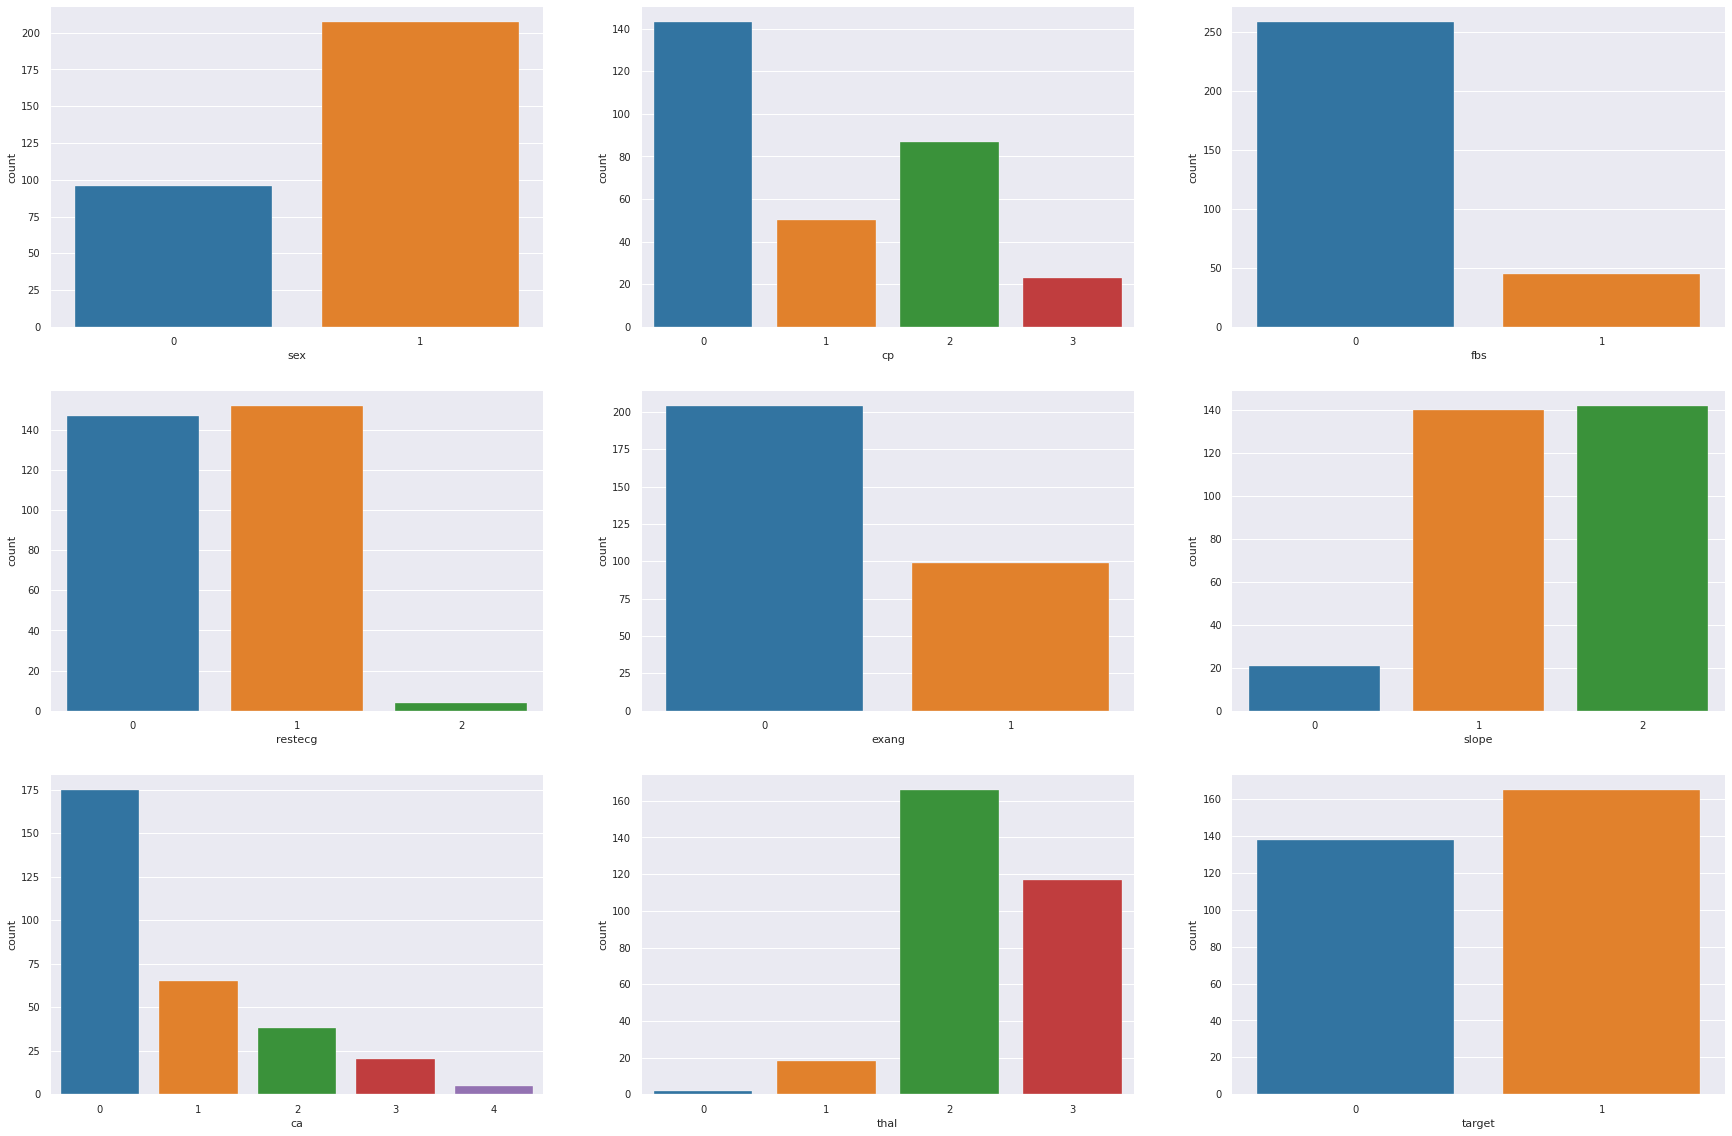

In [14]:
plt.figure(figsize=(30,20))

plt.subplot(3,3,1)
sns.countplot(df['sex'])

plt.subplot(3,3,2)
sns.countplot(df['cp'])

plt.subplot(3,3,3)
sns.countplot(df['fbs'])

plt.subplot(3,3,4)
sns.countplot(df['restecg'])

plt.subplot(3,3,5)
sns.countplot(df['exang'])

plt.subplot(3,3,6)
sns.countplot(df['slope'])

plt.subplot(3,3,7)
sns.countplot(df['ca'])

plt.subplot(3,3,8)
sns.countplot(df['thal'])

plt.subplot(3,3,9)
sns.countplot(df['target'])

plt.show()


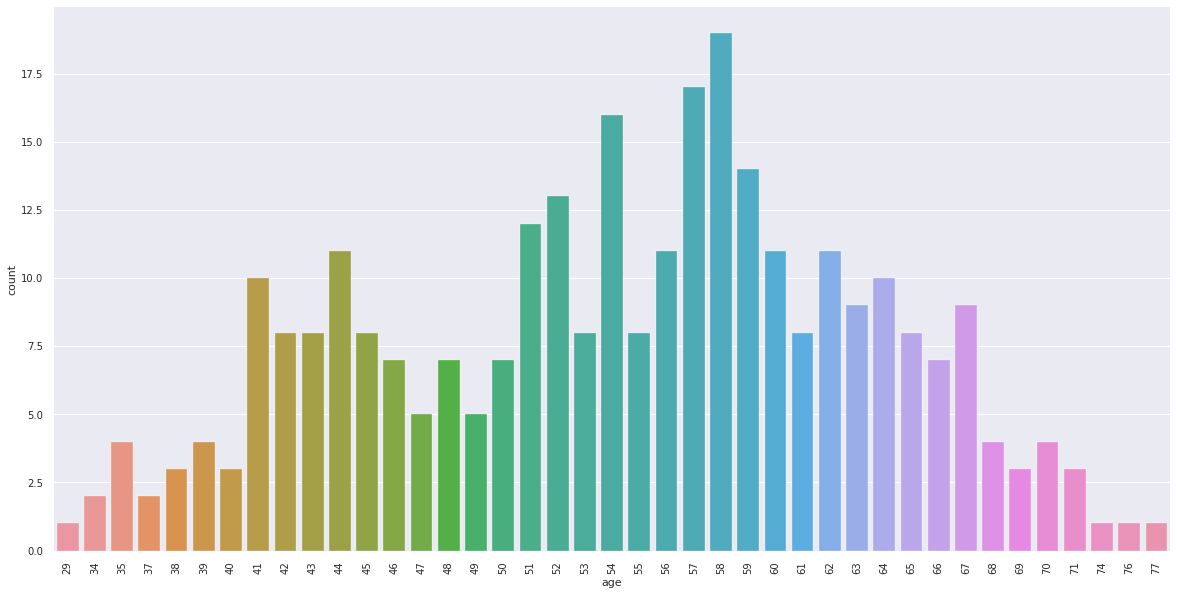

In [15]:
plt.figure(figsize=(20,10))
sns.countplot(df['age'])
plt.xticks(rotation = 90)
plt.show()

# Scatter Plots

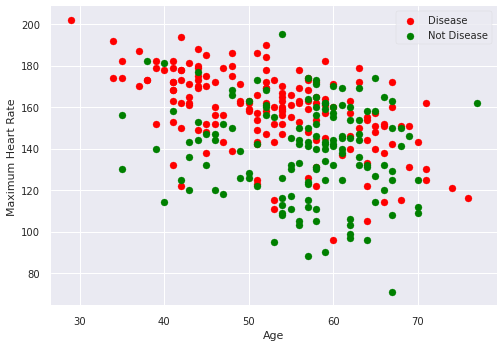

In [16]:

plt.scatter(x=df.age[df.target==1], y=df.thalach[(df.target==1)], c="red")
plt.scatter(x=df.age[df.target==0], y=df.thalach[(df.target==0)], c="green")
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

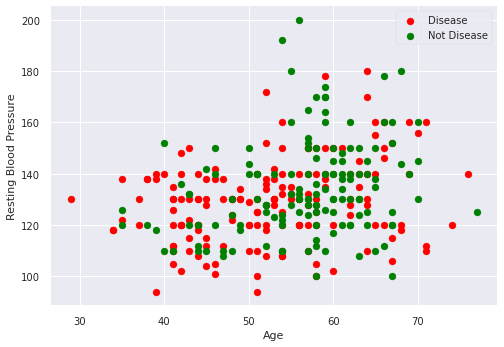

In [17]:
plt.scatter(x=df.age[df.target==1], y=df.trestbps[(df.target==1)], c="red")
plt.scatter(x=df.age[df.target==0], y=df.trestbps[(df.target==0)], c="green")
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Resting Blood Pressure")
plt.show()

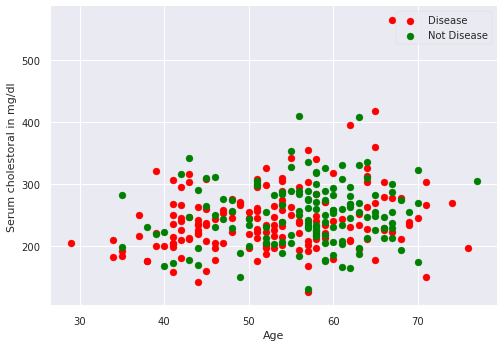

In [18]:
plt.scatter(x=df.age[df.target==1], y=df.chol[(df.target==1)], c="red")
plt.scatter(x=df.age[df.target==0], y=df.chol[(df.target==0)], c="green")
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Serum cholestoral in mg/dl")
plt.show()

# DistPlot

Text(0.5, 1.0, 'Resting Blood Pressure Interval')

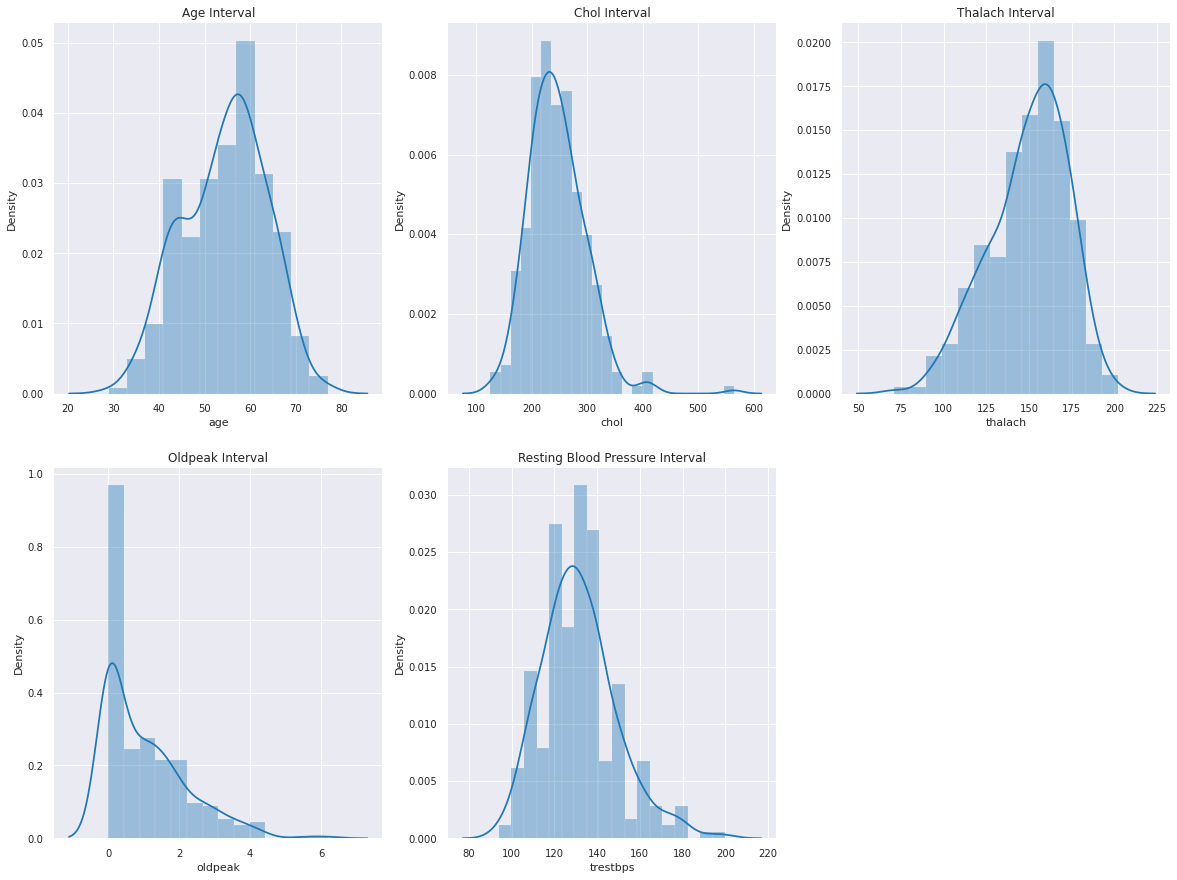

In [19]:
plt.figure(figsize=(20,15))

plt.subplot(2,3,1)
sns.distplot(df['age']).set_title('Age Interval')

plt.subplot(2,3,2)
sns.distplot(df['chol']).set_title('Chol Interval')

plt.subplot(2,3,3)
sns.distplot(df['thalach']).set_title('Thalach Interval')

plt.subplot(2,3,4)
sns.distplot(df['oldpeak']).set_title('Oldpeak Interval')

plt.subplot(2,3,5)
sns.distplot(df['trestbps']).set_title('Resting Blood Pressure Interval')


# BarPlots

> Bar plot representation of features about whether they have heart disease or not

<AxesSubplot:xlabel='target', ylabel='age'>

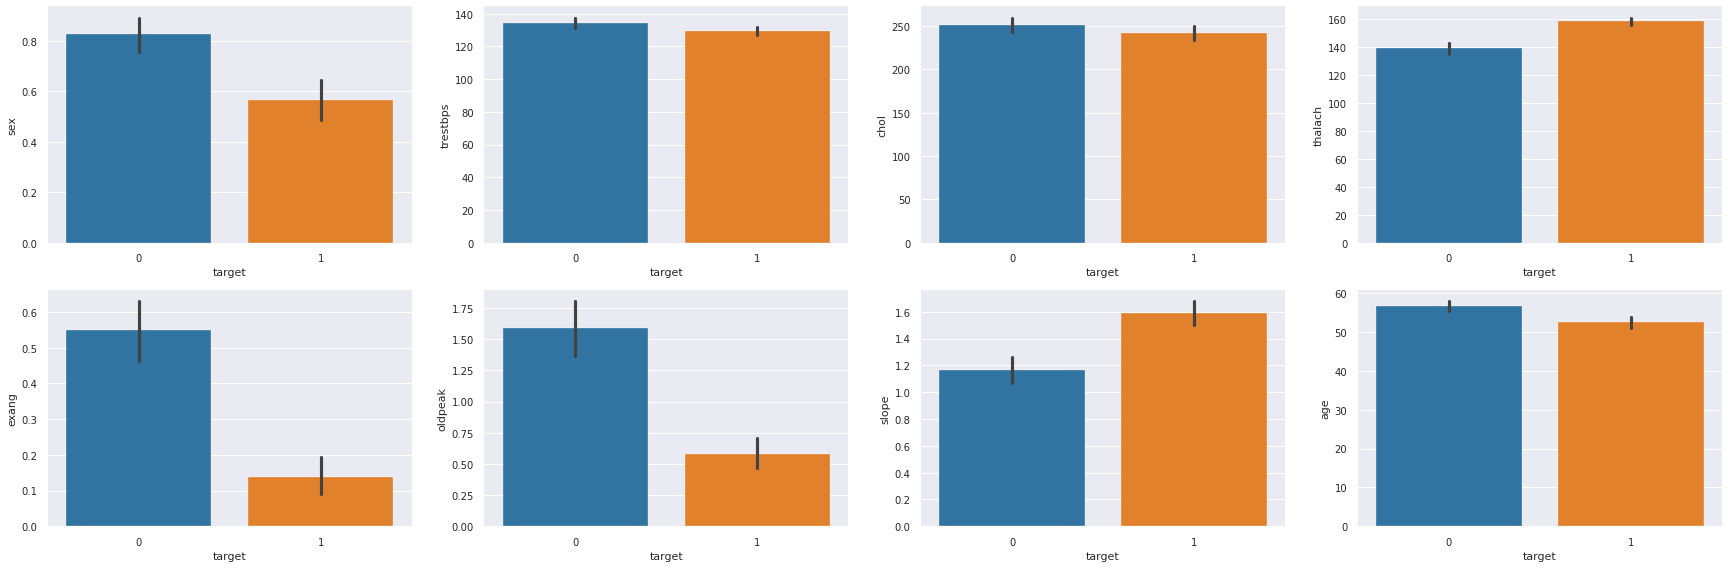

In [20]:
plt.figure(figsize=(30,20))

plt.subplot(4,4,1)
sns.barplot(x = 'target', y = 'sex', data = df)

plt.subplot(4,4,2)
sns.barplot(x = 'target', y = 'trestbps', data = df)

plt.subplot(4,4,3)
sns.barplot(x = 'target', y = 'chol', data = df)

plt.subplot(4,4,4)
sns.barplot(x = 'target', y = 'thalach', data = df)

plt.subplot(4,4,5)
sns.barplot(x = 'target', y = 'exang', data = df)

plt.subplot(4,4,6)
sns.barplot(x = 'target', y = 'oldpeak', data = df)

plt.subplot(4,4,7)
sns.barplot(x = 'target', y = 'slope', data = df)

plt.subplot(4,4,8)
sns.barplot(x = 'target', y = 'age', data = df)

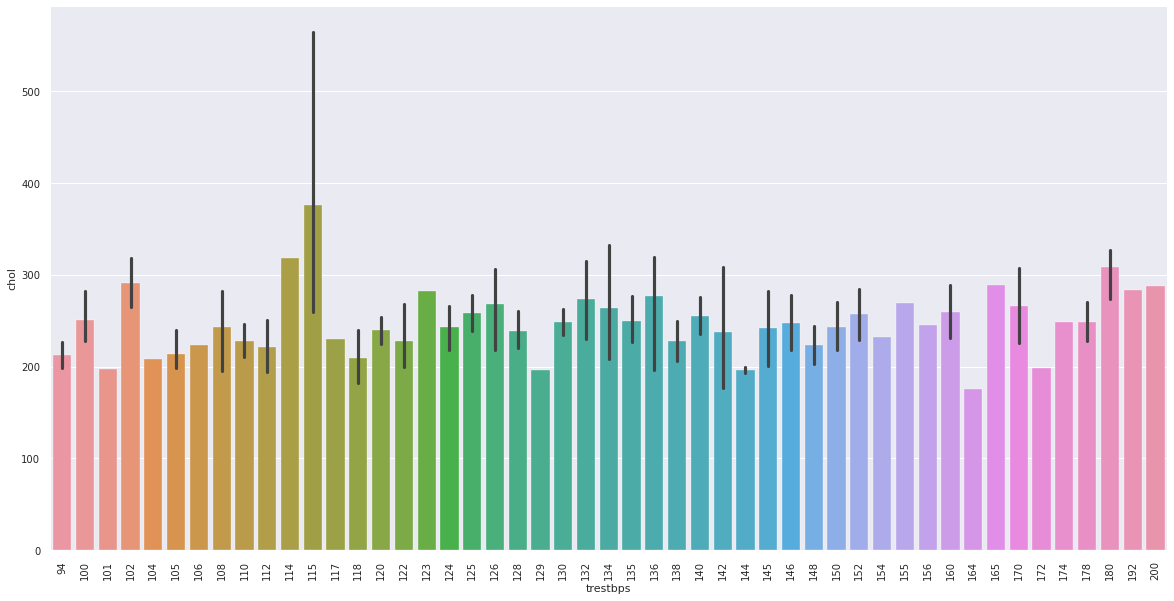

In [21]:
plt.figure(figsize=(20,10))
sns.barplot(x="trestbps", y="chol", data=df)
plt.xticks(rotation=90)
plt.show()

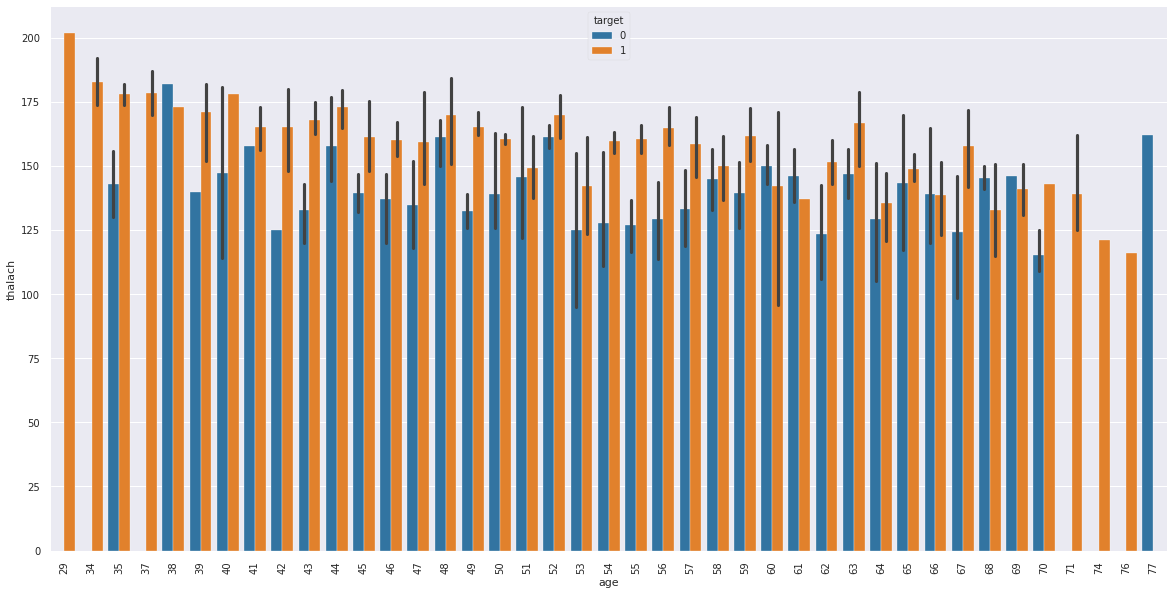

In [22]:
plt.figure(figsize=(20,10))
sns.barplot(x="age", y="thalach", data=df, hue="target")
plt.xticks(rotation=90)
plt.show()

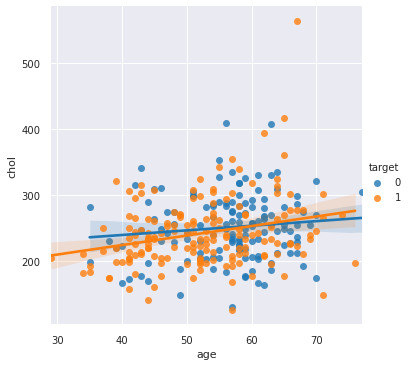

In [23]:
sns.lmplot(x='age', y='chol', hue='target', data=df)

# Pairplot

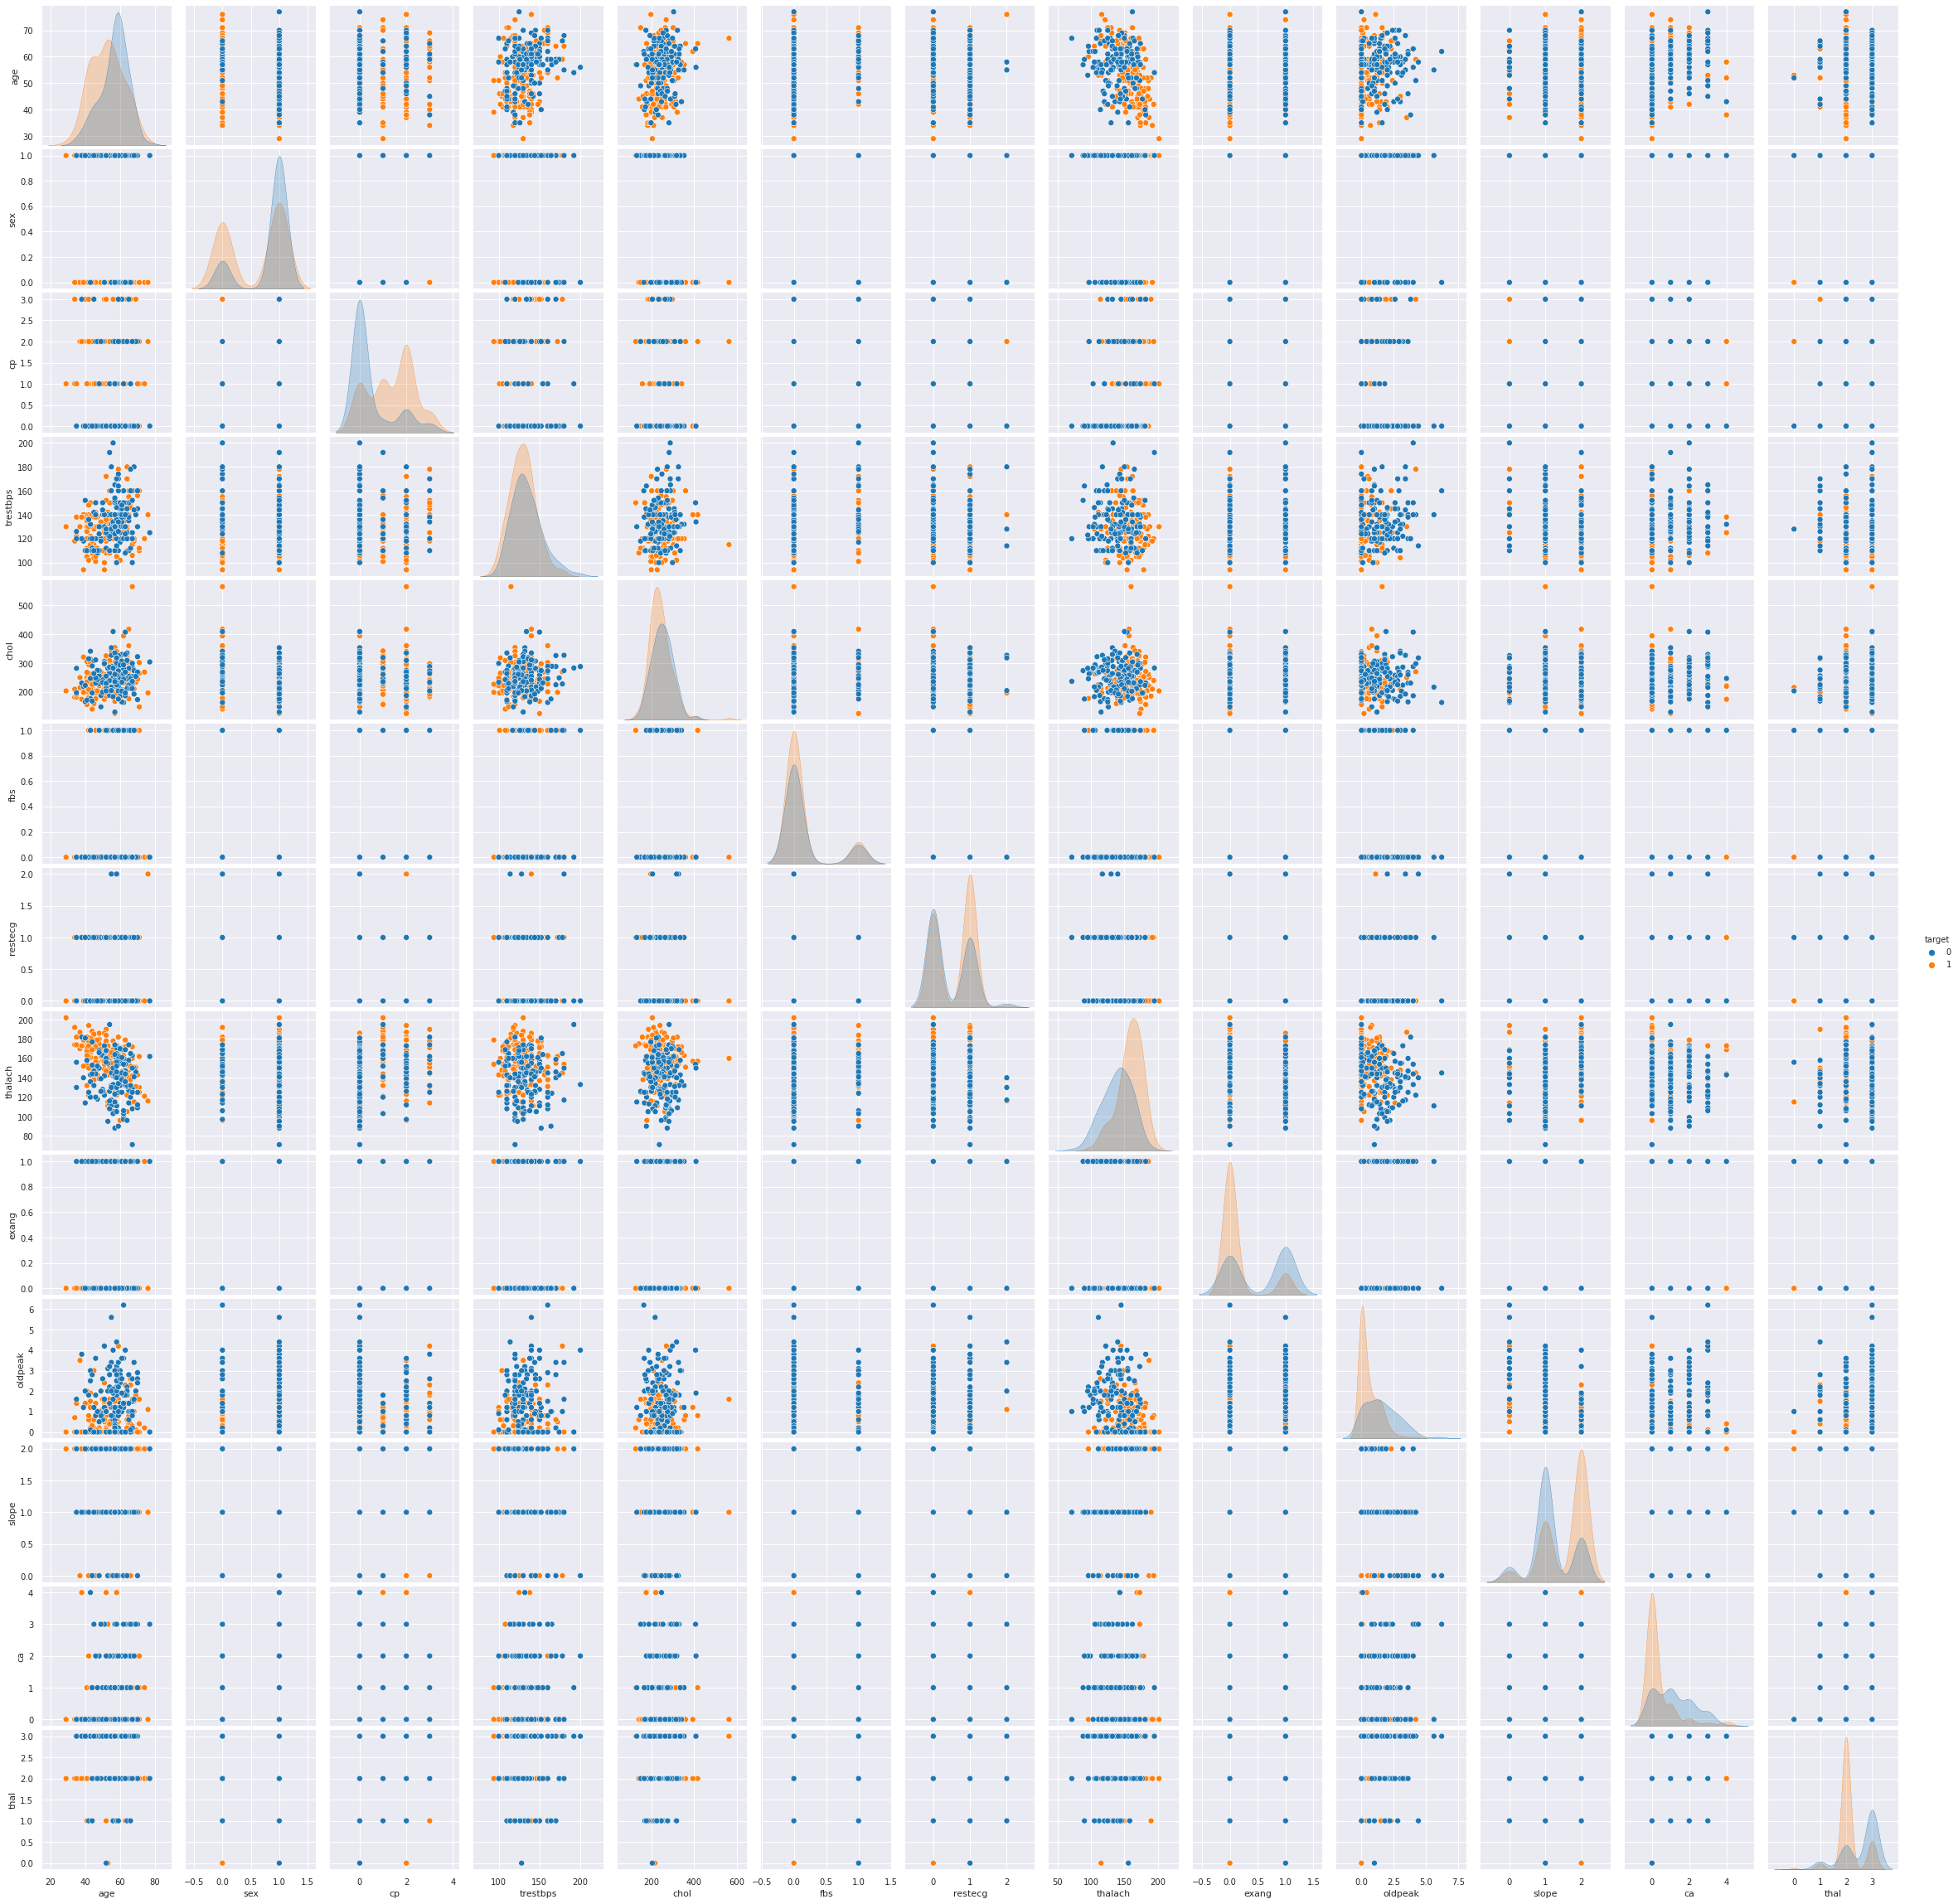

In [24]:
sns.pairplot(data=df, hue="target")

# Heatmap

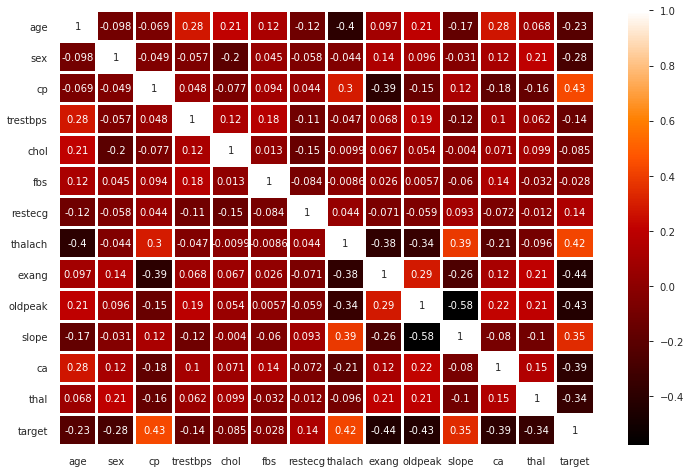

In [25]:
plt.figure(figsize=(12,8)) 
sns.heatmap(df.corr(), annot=True, cmap='gist_heat', linewidths = 2)
plt.show()

# Data Preprocessing

In [26]:
y = df["target"]
X = df.drop('target',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 0)

In [27]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Machine Learning Models

* Logistic Regression
* Naive Bayes
* Random Forest Classifier
* Extreme Gradient Boost
* K-Nearest Neighbour
* Decision Tree
* Support Vector Machine
* Stochastic Gradient Descent
* Neural Nets

In [28]:
model_lgr = 'Logistic Regression'
lr = LogisticRegression()
model = lr.fit(X_train, y_train)
lr_predict = lr.predict(X_test)
lr_conf_matrix = confusion_matrix(y_test, lr_predict)
lr_acc_score = accuracy_score(y_test, lr_predict)
print("confussion matrix")
print(lr_conf_matrix)
print("-------------------------------------------")
print("Accuracy of Logistic Regression:",lr_acc_score*100,'\n')
print("-------------------------------------------")
print(classification_report(y_test,lr_predict))

confussion matrix
[[21  6]
 [ 3 31]]
-------------------------------------------
Accuracy of Logistic Regression: 85.24590163934425 

-------------------------------------------
              precision    recall  f1-score   support

           0       0.88      0.78      0.82        27
           1       0.84      0.91      0.87        34

    accuracy                           0.85        61
   macro avg       0.86      0.84      0.85        61
weighted avg       0.85      0.85      0.85        61



In [29]:
model_nb = 'Naive Bayes'
nb = GaussianNB()
nb.fit(X_train,y_train)
nbpred = nb.predict(X_test)
nb_conf_matrix = confusion_matrix(y_test, nbpred)
nb_acc_score = accuracy_score(y_test, nbpred)
print("confussion matrix")
print(nb_conf_matrix)
print("-------------------------------------------")
print("Accuracy of Naive Bayes model:",nb_acc_score*100,'\n')
print("-------------------------------------------")
print(classification_report(y_test,nbpred))

confussion matrix
[[21  6]
 [ 3 31]]
-------------------------------------------
Accuracy of Naive Bayes model: 85.24590163934425 

-------------------------------------------
              precision    recall  f1-score   support

           0       0.88      0.78      0.82        27
           1       0.84      0.91      0.87        34

    accuracy                           0.85        61
   macro avg       0.86      0.84      0.85        61
weighted avg       0.85      0.85      0.85        61



In [30]:
model_rfc = 'Random Forest Classfier'
rf = RandomForestClassifier(n_estimators=20, random_state=12,max_depth=5)
rf.fit(X_train,y_train)
rf_predicted = rf.predict(X_test)
rf_conf_matrix = confusion_matrix(y_test, rf_predicted)
rf_acc_score = accuracy_score(y_test, rf_predicted)
print("confussion matrix")
print(rf_conf_matrix)
print("-------------------------------------------")
print("Accuracy of Random Forest:",rf_acc_score*100,'\n')
print("-------------------------------------------")
print(classification_report(y_test,rf_predicted))

confussion matrix
[[22  5]
 [ 3 31]]
-------------------------------------------
Accuracy of Random Forest: 86.88524590163934 

-------------------------------------------
              precision    recall  f1-score   support

           0       0.88      0.81      0.85        27
           1       0.86      0.91      0.89        34

    accuracy                           0.87        61
   macro avg       0.87      0.86      0.87        61
weighted avg       0.87      0.87      0.87        61



In [31]:
model_egb = 'Extreme Gradient Boost'
xgb = XGBClassifier(learning_rate=0.01, n_estimators=25, max_depth=15,gamma=0.6, subsample=0.52,colsample_bytree=0.6,seed=27, 
                    reg_lambda=2, booster='dart', colsample_bylevel=0.6, colsample_bynode=0.5)
xgb.fit(X_train, y_train)
xgb_predicted = xgb.predict(X_test)
xgb_conf_matrix = confusion_matrix(y_test, xgb_predicted)
xgb_acc_score = accuracy_score(y_test, xgb_predicted)
print("confussion matrix")
print(xgb_conf_matrix)
print("-------------------------------------------")
print("Accuracy of Extreme Gradient Boost:",xgb_acc_score*100,'\n')
print("-------------------------------------------")
print(classification_report(y_test,xgb_predicted))

[13:40:23] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
confussion matrix
[[24  3]
 [ 3 31]]
-------------------------------------------
Accuracy of Extreme Gradient Boost: 90.1639344262295 

-------------------------------------------
              precision    recall  f1-score   support

           0       0.89      0.89      0.89        27
           1       0.91      0.91      0.91        34

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61



In [32]:
model_knn = 'K-NeighborsClassifier'
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
knn_predicted = knn.predict(X_test)
knn_conf_matrix = confusion_matrix(y_test, knn_predicted)
knn_acc_score = accuracy_score(y_test, knn_predicted)
print("confussion matrix")
print(knn_conf_matrix)
print("-------------------------------------------")
print("Accuracy of K-NeighborsClassifier:",knn_acc_score*100,'\n')
print("-------------------------------------------")
print(classification_report(y_test,knn_predicted))

confussion matrix
[[24  3]
 [ 4 30]]
-------------------------------------------
Accuracy of K-NeighborsClassifier: 88.52459016393442 

-------------------------------------------
              precision    recall  f1-score   support

           0       0.86      0.89      0.87        27
           1       0.91      0.88      0.90        34

    accuracy                           0.89        61
   macro avg       0.88      0.89      0.88        61
weighted avg       0.89      0.89      0.89        61



In [33]:
model_dtc = 'DecisionTreeClassifier'
dt = DecisionTreeClassifier(criterion = 'entropy',random_state=0,max_depth = 6)
dt.fit(X_train, y_train)
dt_predicted = dt.predict(X_test)
dt_conf_matrix = confusion_matrix(y_test, dt_predicted)
dt_acc_score = accuracy_score(y_test, dt_predicted)
print("confussion matrix")
print(dt_conf_matrix)
print("-------------------------------------------")
print("Accuracy of DecisionTreeClassifier:",dt_acc_score*100,'\n')
print("-------------------------------------------")
print(classification_report(y_test,dt_predicted))

confussion matrix
[[23  4]
 [ 7 27]]
-------------------------------------------
Accuracy of DecisionTreeClassifier: 81.9672131147541 

-------------------------------------------
              precision    recall  f1-score   support

           0       0.77      0.85      0.81        27
           1       0.87      0.79      0.83        34

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



In [34]:
model_svc = 'Support Vector Classifier'
svc =  SVC(kernel='rbf', C=2)
svc.fit(X_train, y_train)
svc_predicted = svc.predict(X_test)
svc_conf_matrix = confusion_matrix(y_test, svc_predicted)
svc_acc_score = accuracy_score(y_test, svc_predicted)
print("confussion matrix")
print(svc_conf_matrix)
print("-------------------------------------------")
print("Accuracy of Support Vector Classifier:",svc_acc_score*100,'\n')
print("-------------------------------------------")
print(classification_report(y_test,svc_predicted))

confussion matrix
[[23  4]
 [ 3 31]]
-------------------------------------------
Accuracy of Support Vector Classifier: 88.52459016393442 

-------------------------------------------
              precision    recall  f1-score   support

           0       0.88      0.85      0.87        27
           1       0.89      0.91      0.90        34

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.88        61



In [35]:
model_sgd = 'Stochastic Gradient Descent'
sgdc = SGDClassifier(max_iter=5000, random_state=0)
sgdc.fit(X_train, y_train)
sgdc_predicted = sgdc.predict(X_test)
sgdc_conf_matrix = confusion_matrix(y_test, sgdc_predicted)
sgdc_acc_score = accuracy_score(y_test, sgdc_predicted)
print("confussion matrix")
print(sgdc_conf_matrix)
print("-------------------------------------------")
print("Accuracy of : Stochastic Gradient Descent",sgdc_acc_score*100,'\n')
print("-------------------------------------------")
print(classification_report(y_test,sgdc_predicted))

confussion matrix
[[20  7]
 [ 2 32]]
-------------------------------------------
Accuracy of : Stochastic Gradient Descent 85.24590163934425 

-------------------------------------------
              precision    recall  f1-score   support

           0       0.91      0.74      0.82        27
           1       0.82      0.94      0.88        34

    accuracy                           0.85        61
   macro avg       0.86      0.84      0.85        61
weighted avg       0.86      0.85      0.85        61



In [36]:
model_nn = 'Neural Nets'
mlpc = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5000, 10), random_state=1)
mlpc.fit(X_train, y_train)
mlpc_predicted = mlpc.predict(X_test)
mlpc_conf_matrix = confusion_matrix(y_test, mlpc_predicted)
mlpc_acc_score = accuracy_score(y_test, mlpc_predicted)
print("confussion matrix")
print(mlpc_conf_matrix)
print("-------------------------------------------")
print("Accuracy of : MLP Classifier",mlpc_acc_score*100,'\n')
print("-------------------------------------------")
print(classification_report(y_test,mlpc_predicted))

confussion matrix
[[22  5]
 [ 6 28]]
-------------------------------------------
Accuracy of : MLP Classifier 81.9672131147541 

-------------------------------------------
              precision    recall  f1-score   support

           0       0.79      0.81      0.80        27
           1       0.85      0.82      0.84        34

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



# Confusion Matrix

<AxesSubplot:title={'center':'Heart Disease --- Model: Neural Nets --- Accuracy:0.81967'}>

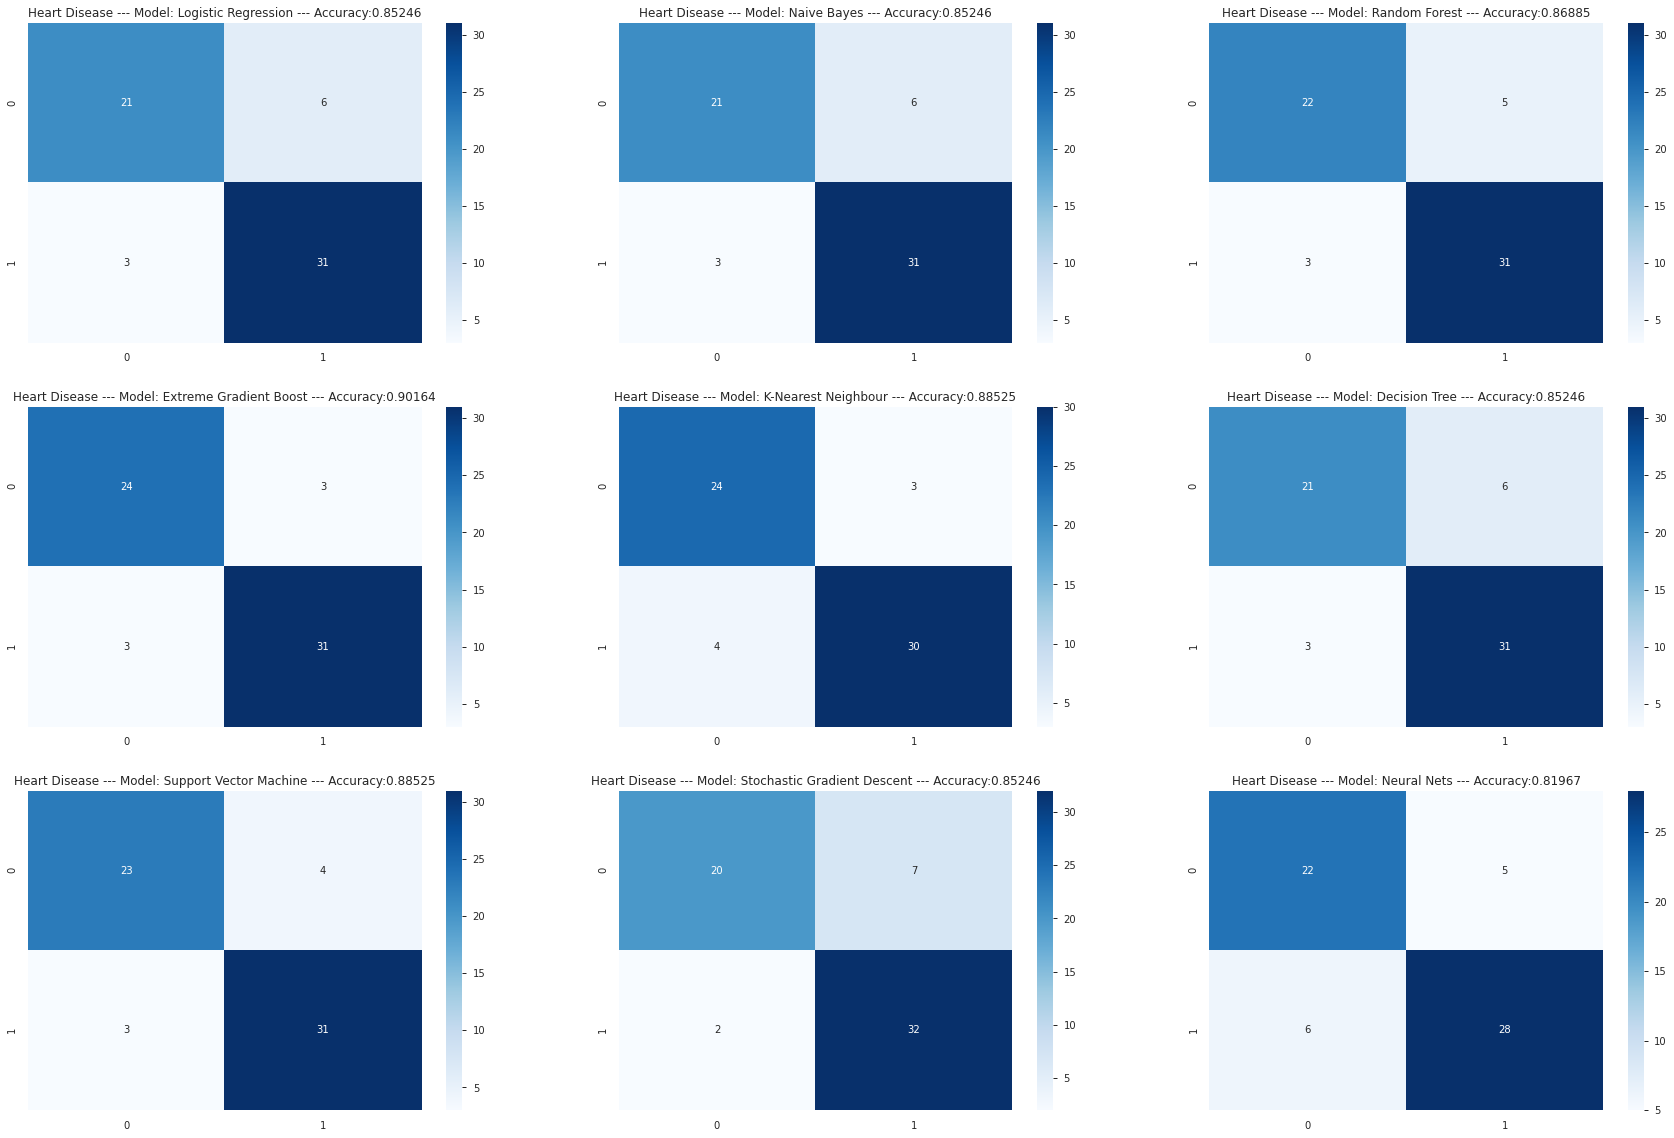

In [37]:
plt.figure(figsize=(30,20))

plt.subplot(3,3,1)
plt.title('Heart Disease --- Model: Logistic Regression --- Accuracy:{x:.5f}'.format(x=lr_acc_score))
sns.heatmap(lr_conf_matrix, annot=True, cmap="Blues")

plt.subplot(3,3,2)
plt.title('Heart Disease --- Model: Naive Bayes --- Accuracy:{x:.5f}'.format(x=nb_acc_score))
sns.heatmap(nb_conf_matrix, annot=True, cmap="Blues")

plt.subplot(3,3,3)
plt.title('Heart Disease --- Model: Random Forest --- Accuracy:{x:.5f}'.format(x=rf_acc_score) )
sns.heatmap(rf_conf_matrix, annot=True, cmap="Blues")

plt.subplot(3,3,4)
plt.title('Heart Disease --- Model: Extreme Gradient Boost --- Accuracy:{x:.5f}'.format(x=xgb_acc_score))
sns.heatmap(xgb_conf_matrix, annot=True, cmap="Blues")

plt.subplot(3,3,5)
plt.title('Heart Disease --- Model: K-Nearest Neighbour --- Accuracy:{x:.5f}'.format(x=knn_acc_score))
sns.heatmap(knn_conf_matrix, annot=True, cmap="Blues")

plt.subplot(3,3,6)
plt.title('Heart Disease --- Model: Decision Tree --- Accuracy:{x:.5f}'.format(x=nb_acc_score))
sns.heatmap(nb_conf_matrix, annot=True, cmap="Blues")

plt.subplot(3,3,7)
plt.title('Heart Disease --- Model: Support Vector Machine --- Accuracy:{x:.5f}'.format(x=svc_acc_score))
sns.heatmap(svc_conf_matrix, annot=True, cmap="Blues")

plt.subplot(3,3,8)
plt.title('Heart Disease --- Model: Stochastic Gradient Descent --- Accuracy:{x:.5f}'.format(x=sgdc_acc_score))
sns.heatmap(sgdc_conf_matrix, annot=True, cmap="Blues")

plt.subplot(3,3,9)
plt.title('Heart Disease --- Model: Neural Nets --- Accuracy:{x:.5f}'.format(x=mlpc_acc_score))
sns.heatmap(mlpc_conf_matrix, annot=True, cmap="Blues")





# Feature Importance

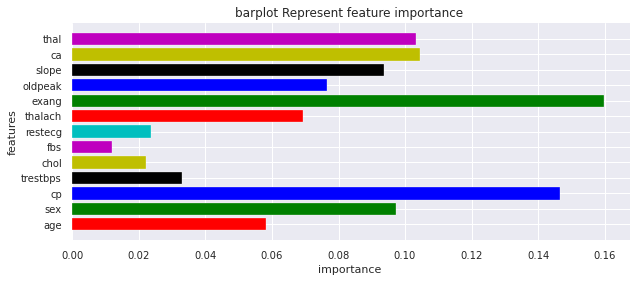

In [38]:
imp_feature = pd.DataFrame({'Feature': ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'], 'Importance': xgb.feature_importances_})
plt.figure(figsize=(10,4))
plt.title("barplot Represent feature importance ")
plt.xlabel("importance ")
plt.ylabel("features")
plt.barh(imp_feature['Feature'],imp_feature['Importance'],color = 'rgbkymc')
plt.show()

# Evaluation of Models

In [39]:
model_ev = pd.DataFrame({'Model': ['Logistic Regression','Naive Bayes','Random Forest','Extreme Gradient Boost',
                    'K-Nearest Neighbour','Decision Tree','Support Vector Machine', 'Stochastic Gradient Descent', 'Neural Nets'], 'Accuracy': [lr_acc_score*100,
                    nb_acc_score*100,rf_acc_score*100,xgb_acc_score*100,knn_acc_score*100,dt_acc_score*100,svc_acc_score*100, sgdc_acc_score*100, mlpc_acc_score*100]})
model_ev

Model   Accuracy
0          Logistic Regression  85.245902
1                  Naive Bayes  85.245902
2                Random Forest  86.885246
3       Extreme Gradient Boost  90.163934
4          K-Nearest Neighbour  88.524590
5                Decision Tree  81.967213
6       Support Vector Machine  88.524590
7  Stochastic Gradient Descent  85.245902
8                  Neural Nets  81.967213

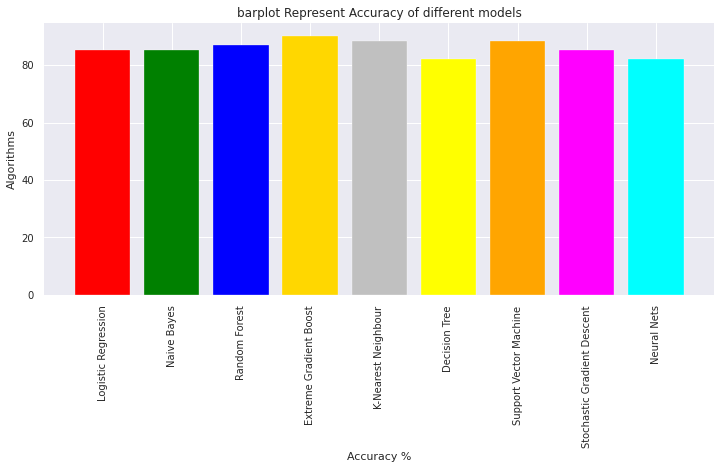

In [40]:
colors = ['red','green','blue','gold','silver','yellow','orange','magenta', 'cyan']
plt.figure(figsize=(12,5))
plt.title("barplot Represent Accuracy of different models")
plt.xlabel("Accuracy %")
plt.xticks(rotation=90)
plt.ylabel("Algorithms")
plt.bar(model_ev['Model'],model_ev['Accuracy'],color = colors)
plt.show()

# Conclusion

> Extreme Gradient Boost gave the best accuracy on test with the : 90.163934